Librairies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib 
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [3]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
df = pd.concat([train, test], ignore_index=True)

In [4]:
data = df.copy()

# On enlève valeurs aberrantes
data = data[data["Surface_habitable_logement"]<=10000]
data = data[data['Conso_5_usages/m²_é_finale']<=15000]
data = data[data['Hauteur_sous-plafond'] < 10]
data = data[data['Emission_GES_éclairage'] <= 1500]

data

,Unnamed: 0,N°DPE,Configuration_installation_chauffage_n°2,Facteur_couverture_solaire_saisi,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Cage_d'escalier,Conso_5_usages_é_finale_énergie_n°2,Type_générateur_froid,Type_émetteur_installation_chauffage_n°2,...,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Qualité_isolation_plancher_haut_comble_perdu,Qualité_isolation_plancher_haut_toit_terrase,Surface_habitable_immeuble,Surface_habitable_logement,Type_bâtiment
0,0,2125E0981916Z,NaN,NaN,110.4,28.3,NaN,10676.1,NaN,NaN,...,insuffisante,bonne,insuffisante,très bonne,NaN,insuffisante,NaN,220.8,220.8,appartement
1,1,2244E1531282F,Installation de chauffage simple,NaN,83.5,10.6,NaN,8678.1,PAC air/air installée à partir de 2015,"Convecteur électrique NFC, NF** et NF***",...,insuffisante,moyenne,insuffisante,insuffisante,NaN,insuffisante,NaN,NaN,83.5,maison
2,2,2335E0208920V,NaN,NaN,68.0,8.9,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,bonne,NaN,très bonne,NaN,NaN,68.0,maison
3,3,2144E0974339H,NaN,NaN,NaN,1.8,NaN,2576.8,NaN,NaN,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,3292.3,47.5,appartement
4,4,2228E2613102B,NaN,NaN,142.5,18.6,NaN,852.8,PAC air/air installée entre 2008 et 2014,NaN,...,insuffisante,insuffisante,insuffisante,moyenne,NaN,insuffisante,NaN,NaN,142.5,maison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2250E2261336L,NaN,NaN,80.6,10.5,NaN,NaN,NaN,NaN,...,insuffisante,bonne,insuffisante,insuffisante,NaN,très bonne,NaN,NaN,80.6,maison
2999996,2999996,2292E0189722P,NaN,NaN,37.0,4.8,NaN,NaN,NaN,NaN,...,insuffisante,moyenne,insuffisante,très bonne,NaN,très bonne,NaN,1000.0,37.0,appartement
2999997,2999997,2284E0314978V,NaN,NaN,78.3,10.7,NaN,NaN,NaN,NaN,...,bonne,bonne,bonne,très bonne,NaN,moyenne,NaN,NaN,78.3,appartement
2999998,2999998,2238E1671131U,NaN,NaN,51.4,6.6,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,insuffisante,NaN,très bonne,NaN,NaN,51.4,appartement


In [5]:
data['Etiquette_DPE'].value_counts()

Etiquette_DPE
D    958888
E    689589
C    671181
F    324568
G    233491
B     73000
A     17995
Name: count, dtype: int64

In [6]:
# Choisissez la catégorie cible et le nombre de lignes à supprimer
categorie_cible = 'D'
nombre_a_supprimer = 400000

# Trouver les index des lignes avec la catégorie cible
indexes_a_supprimer = data[data['Etiquette_DPE'] == categorie_cible].index

# Si vous voulez supprimer un nombre spécifique de lignes
if len(indexes_a_supprimer) > nombre_a_supprimer:
    indexes_a_supprimer = indexes_a_supprimer[:nombre_a_supprimer]

# Supprimer les lignes
data = data.drop(indexes_a_supprimer)

# Afficher le DataFrame mis à jour
print(data['Etiquette_DPE'].value_counts())

Etiquette_DPE
E    689589
C    671181
D    558888
F    324568
G    233491
B     73000
A     17995
Name: count, dtype: int64


In [7]:
# Choisissez la catégorie cible et le nombre de lignes à supprimer
categorie_cible = 'C'
nombre_a_supprimer = 120000

# Trouver les index des lignes avec la catégorie cible
indexes_a_supprimer = data[data['Etiquette_DPE'] == categorie_cible].index

# Si vous voulez supprimer un nombre spécifique de lignes
if len(indexes_a_supprimer) > nombre_a_supprimer:
    indexes_a_supprimer = indexes_a_supprimer[:nombre_a_supprimer]

# Supprimer les lignes
data = data.drop(indexes_a_supprimer)

# Afficher le DataFrame mis à jour
print(data['Etiquette_DPE'].value_counts())

Etiquette_DPE
E    689589
D    558888
C    551181
F    324568
G    233491
B     73000
A     17995
Name: count, dtype: int64


In [8]:
# Choisissez la catégorie cible et le nombre de lignes à supprimer
categorie_cible = 'E'
nombre_a_supprimer = 130000

# Trouver les index des lignes avec la catégorie cible
indexes_a_supprimer = data[data['Etiquette_DPE'] == categorie_cible].index

# Si vous voulez supprimer un nombre spécifique de lignes
if len(indexes_a_supprimer) > nombre_a_supprimer:
    indexes_a_supprimer = indexes_a_supprimer[:nombre_a_supprimer]

# Supprimer les lignes
data = data.drop(indexes_a_supprimer)

# Afficher le DataFrame mis à jour
print(data['Etiquette_DPE'].value_counts())

Etiquette_DPE
E    559589
D    558888
C    551181
F    324568
G    233491
B     73000
A     17995
Name: count, dtype: int64


Traitement data

In [9]:
# Séparer les variables numériques
numerical_vars = data.select_dtypes(include=['int64', 'float64'])

# Séparer les variables qualitatives/catégorielles
categorical_vars = data.select_dtypes(include=['object', 'category'])

cols_to_drop_num = ["Unnamed: 0","Facteur_couverture_solaire_saisi","Code_postal_(BAN)", "Code_postal_(brut)"]

data = data.drop(cols_to_drop_num, axis=1)
numerical_vars = numerical_vars.drop(cols_to_drop_num, axis=1)

for col in numerical_vars :
    data[col] = data[col].fillna(0)

cols_to_drop_cat = ["N°DPE","Code_INSEE_(BAN)", "Qualité_isolation_plancher_haut_comble_aménagé","Nom__commune_(Brut)"]

data = data.drop(cols_to_drop_cat, axis=1)
categorical_vars = categorical_vars.drop(cols_to_drop_cat, axis=1)

for col in categorical_vars:
    data[col] = data[col].fillna(0)

In [11]:
print(numerical_vars.columns)
print(categorical_vars.columns)

Index(['Surface_habitable_desservie_par_installation_ECS',
       'Emission_GES_éclairage', 'Conso_5_usages_é_finale_énergie_n°2',
       'Surface_totale_capteurs_photovoltaïque',
       'Conso_chauffage_dépensier_installation_chauffage_n°1',
       'Coût_chauffage_énergie_n°2', 'Emission_GES_chauffage_énergie_n°2',
       'Facteur_couverture_solaire', 'Année_construction',
       'Conso_5_usages/m²_é_finale', 'Conso_5_usages_é_finale',
       'Hauteur_sous-plafond', 'Surface_habitable_immeuble',
       'Surface_habitable_logement'],
      dtype='object')
Index(['Configuration_installation_chauffage_n°2', 'Cage_d'escalier',
       'Type_générateur_froid', 'Type_émetteur_installation_chauffage_n°2',
       'Type_énergie_n°3', 'Etiquette_GES',
       'Type_générateur_n°1_installation_n°2',
       'Description_générateur_chauffage_n°2_installation_n°2',
       'Classe_altitude', 'Etiquette_DPE', 'N°_département_(BAN)',
       'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries',

Modélisation XGBoost

In [9]:
# Assurez-vous d'abord que 'Etiquette_DPE' est dans les colonnes
if 'Etiquette_DPE' in data.columns:
    # Variables cibles et autres caractéristiques
    y = data['Etiquette_DPE'].astype("category").cat.codes
    X = data.drop(['Etiquette_DPE'], axis=1)

    # Encode les variables pour le modèle
    for column in X.columns:
        X[column] = X[column].astype("category").cat.codes

    # Séparation des données après rééquilibrage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle d'arbre de décision
    model = xgb.XGBClassifier(num_class=7, n_estimators=180, learning_rate=0.167, max_depth=7)
    model.fit(X_train, y_train)

    # Évaluation
    y_pred = model.predict(X_test)
    train_accuracy = model.score(X_train, y_train)
    print("Training Accuracy:", train_accuracy)

    print("Validation Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

else:
    print("La colonne 'Etiquette_DPE' n'est pas dans les données.")

Training Accuracy: 0.9843501427786664
Validation Accuracy: 0.9799695089737204

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      3670
           1       0.96      0.95      0.95     14590
           2       0.98      0.99      0.99    110304
           3       0.98      0.98      0.98    111561
           4       0.98      0.98      0.98    112109
           5       0.98      0.97      0.97     64666
           6       0.98      0.98      0.98     46843

    accuracy                           0.98    463743
   macro avg       0.98      0.97      0.97    463743
weighted avg       0.98      0.98      0.98    463743



Prédiction

In [10]:
data_val = pd.read_csv("data/val.csv")

In [11]:
cols_to_drop_num.remove("Unnamed: 0")

data_val = data_val.drop(cols_to_drop_num, axis=1)
data_val = data_val.drop(cols_to_drop_cat, axis=1)

# Séparer les variables numériques
val_numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Séparer les variables qualitatives/catégorielles
val_categorical_cols = data.select_dtypes(include=['object', 'category'])

for col in val_numeric_cols :
    data[col] = data[col].fillna(0)

for col in val_categorical_cols:
    data[col] = data[col].fillna(0)

for column in data_val.columns:
        data_val[column] = data_val[column].astype("category").cat.codes

prediction_val = model.predict(data_val)

In [12]:
# Sauvegarde modèle
Numero = 51
joblib.dump(model, "model/model_perf_"+str(Numero)+".sav")

# Convertissez les prédictions en DataFrame et changez le type de données en 'object'
prediction = pd.DataFrame(prediction_val, columns=['Etiquette_DPE']).astype(object)

# Remplacez les valeurs numériques par des lettres correspondant à l'étiquette DPE
mapping = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}
prediction['Etiquette_DPE'] = prediction['Etiquette_DPE'].replace(mapping)

# Affichez les fréquences des étiquettes DPE prédites
print(prediction['Etiquette_DPE'].value_counts())

# Créez un DataFrame pour la soumission
df_soumission = pd.DataFrame()
data_soumission = pd.read_csv("data/val.csv")

# Assurez-vous que "N°DPE" est une colonne dans votre CSV
df_soumission["N°DPE"] = data_soumission["N°DPE"]
df_soumission["Etiquette_DPE"] = prediction['Etiquette_DPE']
df_soumission.to_csv("prediction/model_perf_"+str(Numero)+".csv", index=False)

Etiquette_DPE
D    93010
C    74286
E    66558
F    34342
G    22519
B     7343
A     2311
Name: count, dtype: int64


Interprétation

Feature ranking:
1. feature Etiquette_GES (0.4839)
2. feature Conso_5_usages/m²_é_finale (0.2342)
3. feature Conso_5_usages_é_finale_énergie_n°2 (0.1026)
4. feature Type_bâtiment (0.0255)
5. feature Classe_altitude (0.0244)
6. feature Surface_habitable_immeuble (0.0209)
7. feature Type_énergie_n°3 (0.0141)
8. feature Configuration_installation_chauffage_n°2 (0.0129)
9. feature Emission_GES_chauffage_énergie_n°2 (0.0119)
10. feature Conso_chauffage_dépensier_installation_chauffage_n°1 (0.0088)
11. feature Emission_GES_éclairage (0.0084)
12. feature Surface_habitable_logement (0.0080)
13. feature Coût_chauffage_énergie_n°2 (0.0064)
14. feature Type_générateur_n°1_installation_n°2 (0.0037)
15. feature Qualité_isolation_enveloppe (0.0035)
16. feature Conso_5_usages_é_finale (0.0030)
17. feature Année_construction (0.0029)
18. feature Qualité_isolation_murs (0.0027)
19. feature Surface_habitable_desservie_par_installation_ECS (0.0026)
20. feature Description_générateur_chauffage_n°2_install

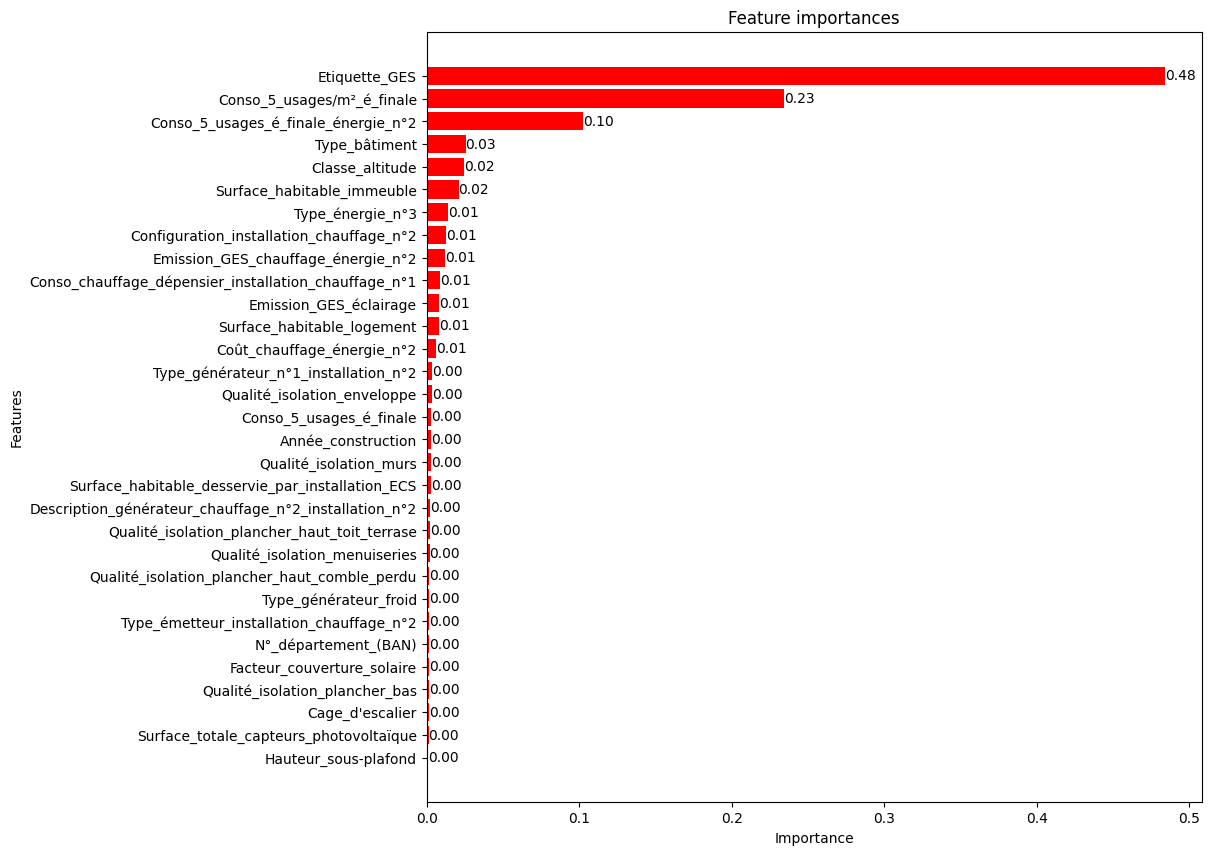

In [13]:
# Récupérer l'importance des caractéristiques
importances = model.feature_importances_

# Trier les caractéristiques par importance
indices = np.argsort(importances)[::-1]

# Afficher le classement des caractéristiques
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Tracer l'importance des caractéristiques dans un graphique à barres horizontales
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
bars = plt.barh(range(X_train.shape[1]), importances[indices], color="r", align="center")

# Ajouter des étiquettes pour chaque barre
for bar in bars:
    plt.text(
        bar.get_width(),  # Position x de l'étiquette
        bar.get_y() + bar.get_height() / 2,  # Position y de l'étiquette
        f'{bar.get_width():.2f}',  # Valeur de l'étiquette
        va='center',  # Centrer verticalement
        ha='left'  # Aligner horizontalement à gauche
    )

plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.gca().invert_yaxis()  # Inverser l'axe y
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()